In [1]:
# Way of installing new packages
# Installing tensorflow GPU
!pip install tensorflow-gpu==2.3.0

     |████████████████████████████████| 320.4MB 29kB/s 


In [2]:
# Installing mlxtend for plotting
!pip install mlxtend==0.17.3 

     |████████████████████████████████| 1.3MB 3.4MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [3]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D,Dropout

In [4]:
tf.__version__

'2.3.0'

In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


In [6]:
# importing cifar10 data from keras
from tensorflow.keras.datasets import cifar10

**CIFAR-10**  is an established computer-vision dataset used for object recognition. It is a subset of the 80 million tiny images dataset and consists of 60,000 32x32 color images containing one of 10 object classes, with 6000 images per class. It was collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.

In [27]:
# Loading data to tuple
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [29]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [30]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [31]:
x_train.max()

255

In [32]:
x_train.min()

0

In [33]:
# Converting all value from 0 to 255 to normal value from 0 to 1
x_train,x_test = x_train/255,x_test/255

In [34]:
# Now  all image matrix pixels in x_train and x_test value ranging from 0 to 1
x_train.max()

1.0

In [35]:
# Output lables from 0 to 1
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [36]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

**Checking Input Images**

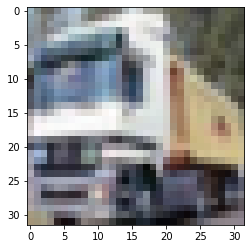

In [38]:
plt.figure()
plt.imshow(x_train[1])

In [40]:
y_train
# index 1 position -> Truck

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

## Build CNN Model

In [61]:
model = Sequential()

In [62]:
# Convolutional layers with zero padding
model.add(Conv2D(filters = 32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(32,32,3)))

model.add(Conv2D(filters = 32,kernel_size=(3,3),padding='same',activation='relu'))

# Adding maxpool layer
model.add(MaxPool2D(pool_size=(2,2), strides=2,padding='valid'))

# Dropping 50% of input parameters
model.add(Dropout(0.5))

# Adding Flatten to convert 2D image feature map to 1D
model.add(Flatten())

# Adding Dense layer having 128 neurons as fully connected layers
model.add(Dense(units= 128,activation='relu'))

# Dense layer as final output layer having 10 output nodes
model.add(Dense(units= 10,activation='softmax'))


In [63]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [64]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [65]:
history = model.fit(x_train,y_train,batch_size=10,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
4000/4000 [==============================] - 161s 40ms/step - loss: 1.4354 - sparse_categorical_accuracy: 0.4861 - val_loss: 1.1452 - val_sparse_categorical_accuracy: 0.5931
Epoch 2/10
4000/4000 [==============================] - 161s 40ms/step - loss: 1.1101 - sparse_categorical_accuracy: 0.6061 - val_loss: 1.0356 - val_sparse_categorical_accuracy: 0.6421
Epoch 3/10
4000/4000 [==============================] - 164s 41ms/step - loss: 0.9835 - sparse_categorical_accuracy: 0.6550 - val_loss: 0.9759 - val_sparse_categorical_accuracy: 0.6596
Epoch 4/10
4000/4000 [==============================] - 162s 40ms/step - loss: 0.8953 - sparse_categorical_accuracy: 0.6834 - val_loss: 0.9595 - val_sparse_categorical_accuracy: 0.6663
Epoch 5/10
4000/4000 [==============================] - 164s 41ms/step - loss: 0.8195 - sparse_categorical_accuracy: 0.7083 - val_loss: 0.9134 - val_sparse_categorical_accuracy: 0.6862
Epoch 6/10
4000/4000 [==============================] - 163s 41ms/step - lo

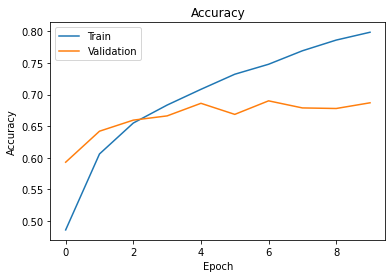

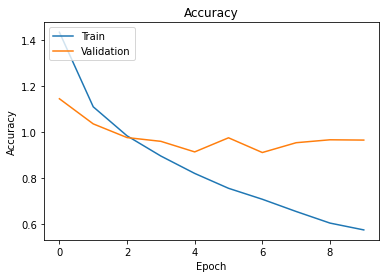

In [68]:
# Plotting training and validation accuracy
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

# Plotting training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [70]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [71]:
y_pred = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [73]:
y_pred

array([3, 8, 8, ..., 3, 1, 7])

In [76]:
y_test
# Third last is wrongly predicted as 3rd class

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [77]:
confusion_mat = confusion_matrix(y_test,y_pred)

In [78]:
confusion_mat

array([[736,  20,  39,  31,  27,  10,  14,  11,  53,  59],
       [ 17, 818,  10,   3,   7,   3,   8,   1,  29, 104],
       [ 70,   8, 498,  69, 149,  66,  75,  40,  15,  10],
       [ 20,  15,  50, 502,  99, 159,  82,  36,  13,  24],
       [ 21,   5,  37,  57, 736,  23,  51,  52,  11,   7],
       [ 14,   4,  59, 195,  87, 526,  41,  54,   9,  11],
       [  4,   8,  44,  68,  88,  14, 753,  11,   7,   3],
       [  8,   3,  35,  44,  83,  33,  17, 754,   2,  21],
       [ 69,  38,  12,  12,  13,   4,  11,   5, 795,  41],
       [ 24, 105,   6,  22,   7,   6,   6,  25,  28, 771]])

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0a3d08ef60>)

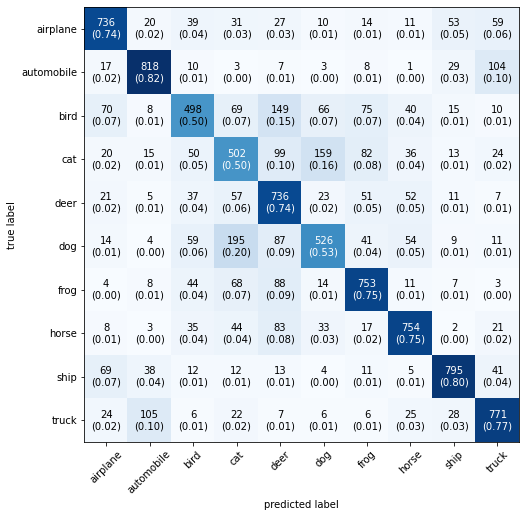

In [79]:
plot_confusion_matrix(confusion_mat,figsize=(12,8),class_names= class_names,show_normed = True)